### Breast Cancer Dataset

In [80]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bc_data = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = bc_data.data.features 
y = bc_data.data.targets 
  
# metadata 
#print(bc_data.metadata) 
  
# variable information 
print(bc_data.variables)

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

In [81]:
import numpy as np
import sys
sys.path.append("..")
from knn import KNearestNeighbours # KNN implementation
from classification_tree import ClassificationTree #Tree implementation
from cross_validation import k_folds_accuracy_score, leave_one_out_score #Model Eval
from train_test_split import train_test_split #Splitting training and testing
from preprocessing import MinMaxScaler #Basic Normalisation

In [82]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = []  # No categorical columns for feature set
numerical_cols = [col for col in X.columns if col not in ['ID', 'Diagnosis']]


# Create transformers for the pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # or median
    ('scaler', MinMaxScaler())  # Normalizing numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Use OrdinalEncoder for ordinal data
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the preprocessing pipeline to your data
X_preprocessed = preprocessor.fit_transform(X)

#Converting labels into a 1-D array
y = y['Diagnosis'].values

In [83]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.25, seed=42)

# Step 3: Train the model
k = 5
knn = KNearestNeighbours(k)
knn.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = knn.predict(X_test)
accuracy = np.mean(y_test == y_pred)
print(y_test == y_pred)
print(f"Accuracy: {accuracy}")

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True]
Accuracy: 0.9436619718309859


In [84]:
tree = ClassificationTree(max_depth=5)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
accuracy = np.mean(y_test == y_pred_tree)
print(y_test == y_pred_tree)
print(f"Accuracy: {accuracy}")
feature_names = X.columns.tolist()
print(tree.print_tree(feature_names = feature_names))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True False  True  True  True  True False  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
Accuracy: 0.9366197183098591
area3 <= 0.17290110106173812
Left:
|   concave_points3 <= 0.552233676975945
|   Left:
|   |   concave_poin

### Heart Disease Dataset

In [85]:
from ucimlrepo import fetch_ucirepo 
  
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features.values
y = heart_disease.data.targets.values.ravel()  # Flatten the target array

  
# metadata 
#print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [86]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming the order of columns in your dataset is as follows:
# ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Identifying categorical and numerical column indices
categorical_col_indices = [1, 2, 5, 6, 8, 10, 12]  # indices of categorical columns
numerical_col_indices = [0, 3, 4, 7, 9, 11]  # indices of numerical columns

# Define the transformers for the numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('encoder', OneHotEncoder(handle_unknown='error'))
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_col_indices),
        ('cat', categorical_transformer, categorical_col_indices)
    ])

# Applying the transformations to the dataset
X_preprocessed = preprocessor.fit_transform(X)


# Now X_preprocessed is the preprocessed feature matrix
print(X_preprocessed[0])


[0.70833333 0.48113208 0.24429224 0.60305344 0.37096774 0.
 0.         1.         1.         0.         0.         0.
 0.         1.         0.         0.         1.         1.
 0.         0.         0.         1.         0.         0.
 1.         0.        ]


In [87]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.25, seed=2109)

# Step 3: Train the model
k = 10
knn = KNearestNeighbours(k)
knn.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = knn.predict(X_test)
accuracy = np.mean(y_test == y_pred)
print(y_test == y_pred)
print(f"Accuracy: {accuracy}")

[False  True  True False  True  True  True  True  True  True False  True
 False False  True False False  True False False  True  True  True  True
  True False  True False False  True False  True False  True  True False
  True  True  True  True  True False False  True  True False  True False
  True  True False  True  True False  True False False  True False  True
  True False False False False  True False  True  True False  True  True
  True False False]
Accuracy: 0.5733333333333334


In [88]:
tree = ClassificationTree(max_depth=4)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
accuracy = np.mean(y_test == y_pred_tree)
print(y_test == y_pred_tree)
print(f"Accuracy: {accuracy}")
print(tree.print_tree())

[False False  True False False  True  True  True  True  True  True  True
 False False  True  True  True  True False False  True  True  True  True
  True  True  True False False  True False  True False  True  True False
  True  True  True  True  True False False  True  True False  True False
  True  True False  True  True False  True False False  True False  True
 False False False  True False False False  True False False  True  True
  True False False]
Accuracy: 0.5733333333333334
X[22] <= 1.0
Left:
|   X[4] <= 0.0967741935483871
|   Left:
|   |   X[2] <= 0.23515981735159813
|   |   Left:
|   |   |   X[0] <= 0.25
|   |   |   Left:
|   |   |   |   --> Class: 1.0
|   |   |   Right:
|   |   |   |   --> Class: 0.0
|   |   Right:
|   |   |   X[14] <= 1.0
|   |   |   Left:
|   |   |   |   --> Class: 1.0
|   |   |   Right:
|   |   |   |   --> Class: 0.0
|   Right:
|   |   X[3] <= 0.48091603053435106
|   |   Left:
|   |   |   X[4] <= 0.4516129032258064
|   |   |   Left:
|   |   |   |   --> Cl

The algorithms perform very poorly on the heart disease dataset. I want to try and test on more categorical data to see if it's an issue on how this is being preprocessed.

### Car Eval Dataset

In [120]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
#print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 

# Convert Pandas DataFrame to NumPy arrays
X_np = X.to_numpy()
y_np = y.to_numpy().ravel()  # Convert y to a flat array

print(" ")
print(X_np[:4])
print(y_np[:4])

       name     role         type demographic  \
0    buying  Feature  Categorical        None   
1     maint  Feature  Categorical        None   
2     doors  Feature  Categorical        None   
3   persons  Feature  Categorical        None   
4  lug_boot  Feature  Categorical        None   
5    safety  Feature  Categorical        None   
6     class   Target  Categorical        None   

                                         description units missing_values  
0                                       buying price  None             no  
1                           price of the maintenance  None             no  
2                                    number of doors  None             no  
3              capacity in terms of persons to carry  None             no  
4                           the size of luggage boot  None             no  
5                        estimated safety of the car  None             no  
6  evaulation level (unacceptable, acceptable, go...  None             no  

In [123]:
from sklearn.preprocessing import LabelEncoder


# List of feature names, replace with actual names from your dataset
feature_names = ['buying prices', 'maintenance price', 'doors', 'capacity', 'boot size', 'safety']

# Create an Ordinal Encoder instance
ordinal_encoder = OrdinalEncoder()

# Apply the encoder to your data
X_encoded = ordinal_encoder.fit_transform(X)
print(X_encoded[:4])
# Now X_encoded contains the ordinal-encoded values

# Assuming y is your original target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y).ravel()
print(y_encoded[:4])

# To get the mapping of categories for each feature (useful for interpretation)
category_mappings = {feature: list(ordinal_encoder.categories_[i]) 
                     for i, feature in enumerate(feature_names)}

print(category_mappings)

[[3. 3. 0. 0. 2. 1.]
 [3. 3. 0. 0. 2. 2.]
 [3. 3. 0. 0. 2. 0.]
 [3. 3. 0. 0. 1. 1.]]
[2 2 2 2]
{'buying prices': ['high', 'low', 'med', 'vhigh'], 'maintenance price': ['high', 'low', 'med', 'vhigh'], 'doors': ['2', '3', '4', '5more'], 'capacity': ['2', '4', 'more'], 'boot size': ['big', 'med', 'small'], 'safety': ['high', 'low', 'med']}


/Users/nathan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [148]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.25, seed=3456)


knn_car = KNearestNeighbours(10)
knn_car.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = knn_car.predict(X_test)  # Predict on the testing data
accuracy = np.mean(y_pred == y_test)  # Calculate accuracy

print(f"Model Accuracy: {accuracy}")
print(y_pred == y_test)


Model Accuracy: 0.8888888888888888
[ True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True False  True  True  True  True False  True  True  True  True  True
  True  True  True  True False  True  True False  True  True  True False
  True  True  True  True  True  True False  True False  True  True  True
  True  True  True  True  True False  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True False  True  True  True  True False  True  True
  True  True  True  True  True False  True  True  True  True False  True
  True  True  Tr

In [149]:
tree_car = ClassificationTree(max_depth=8)
tree_car.fit(X_train,y_train)
# Step 3: Evaluate the model
y_pred = tree_car.predict(X_test)  # Predict on the testing data
accuracy = np.mean(y_pred == y_test)  # Calculate accuracy

print(f"Model Accuracy: {accuracy}")
print(y_pred == y_test)
tree_car.print_tree(feature_names = feature_names)

Model Accuracy: 0.9490740740740741
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  Tr

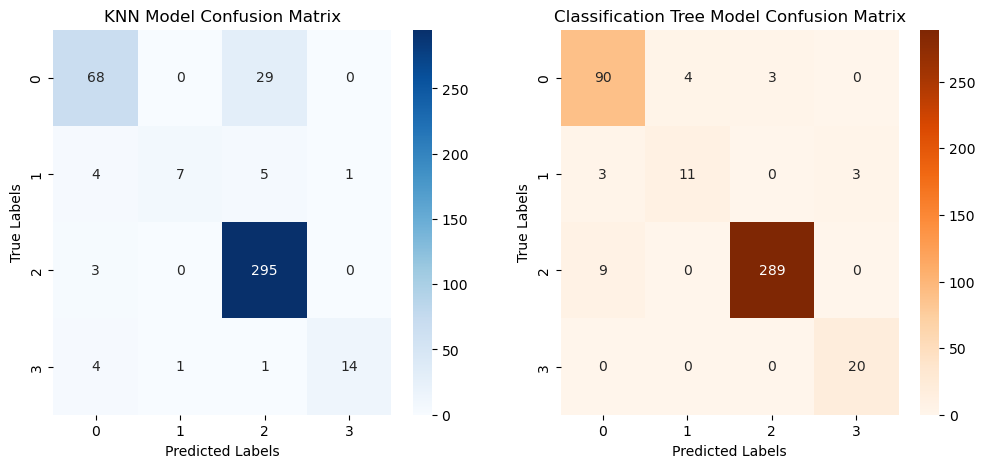

In [150]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# For the KNN model
y_pred_knn = knn_car.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# For the Classification Tree model
y_pred_tree = tree_car.predict(X_test)
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Now, to display these confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the confusion matrix for the KNN model
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('KNN Model Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plotting the confusion matrix for the Classification Tree model
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title('Classification Tree Model Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.show()
